In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Data

In [3]:
m, b = np.random.uniform(-5, 5, 2)  # Generates two random values in [-5, 5]
x = np.arange(-5, 5, 0.1)
Y = m * x + b + np.random.randn(*x.shape)  # Adds Gaussian noise

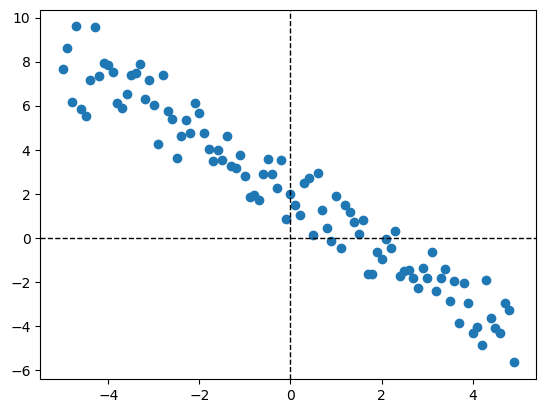

In [4]:
plt.scatter(x,Y)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # y = 0 line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # x = 0 line

plt.show()

# Implementation

In [6]:
LOGS = False

In [7]:
# Hyperparameters
learning_rate = 0.01  # Step size for updating m and b
max_epochs = 10000         # Number of iterations
tolerance = 1e-4      # Stop when cost change is below this threshold

# Initialize m and b randomly
m = 0.0
b = 0.0

# Number of training examples
n = len(x)

previous_cost = float('inf')  # Initialize previous cost to a very large number

# Gradient Descent Loop
for epoch in range(max_epochs):
    # Predict y values
    Y_pred = m * x + b
    
    # Compute the cost function (Mean Squared Error)
    cost = (1/n) * sum((Y_pred - Y) ** 2)

    # Check for early stopping condition
    if abs(previous_cost - cost) < tolerance:
        print(f"Stopping early at Epoch {epoch}: Cost={cost:.4f}, m={m:.4f}, b={b:.4f}")
        break
    else:
        previous_cost = cost
    
    # Compute gradients (derivatives)
    dm = (2/n) * sum(x * (Y_pred - Y))  # Partial derivative with respect to m
    db = (2/n) * sum(Y_pred - Y)        # Partial derivative with respect to b
    
    # Update m and b using gradient descent
    m = m - learning_rate * dm
    b = b - learning_rate * db

    # Print progress every 100 iterations
    if LOGS:
        print(f"Epoch {epoch}: Cost={cost:.4f}, m={m:.4f}, b={b:.4f}")

# Final output
print(f"Final equation: y = {m:.4f}x + {b:.4f}")

Stopping early at Epoch 184: Cost=0.8994, m=-1.2863, b=1.9589
Final equation: y = -1.2863x + 1.9589


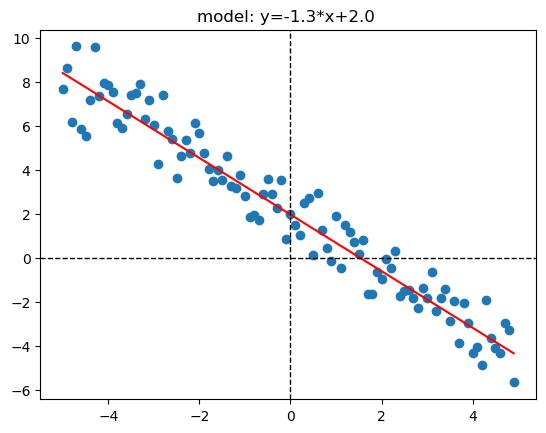

In [8]:
y_pred = x * m + b

plt.scatter( x, Y, color="tab:blue", label="data")
plt.plot( x, y_pred, color="r", label="model")
plt.title(f"model: y={m:.2}*x+{b:.2} ")

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # y = 0 line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # x = 0 line
plt.show()

# Library - pol(1)

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [11]:
X = x.reshape(-1,1)

# Feature Scaling (important for Gradient Descent)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the model
sgd = SGDRegressor(max_iter=10000, tol=1e-5, learning_rate="invscaling", eta0=0.1)
sgd.fit(X_scaled, Y)

# Get learned parameters (but they are for scaled X)
m = sgd.coef_[0]
b = sgd.intercept_[0]

# Convert m back to the original scale
m = m / scaler.scale_[0]  # Adjust for scaling
b = b - (m * scaler.mean_[0] / scaler.scale_[0])  # Adjust intercept

print(f"Final equation: y = {m:.4f}x + {b:.4f}")

Final equation: y = -1.2765x + 1.9848


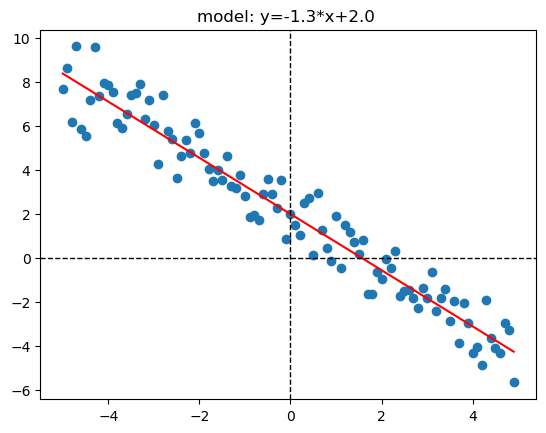

In [12]:
y_pred = x * m + b

plt.scatter( x, Y, color="tab:blue", label="data")
plt.plot( x, y_pred, color="r", label="model")
plt.title(f"model: y={m:.2}*x+{b:.2} ")

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # y = 0 line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # x = 0 line
plt.show()

# Library - pol(2)

In [14]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

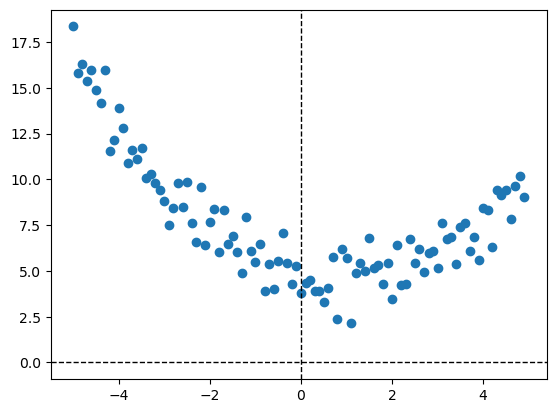

In [15]:
A, B, C = np.random.uniform(-5, 5, 3)  # Generates two random values in [-5, 5]
x = np.arange(-5, 5, 0.1)
Y = A*x**2 + B*x + C + np.random.randn(*x.shape)  # Adds Gaussian noise

plt.scatter(x,Y)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # y = 0 line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # x = 0 line
plt.show()

In [16]:
# Prepare features: [x, x^2]
X = np.column_stack((x, x**2))

# Create pipeline with scaling and SGDRegressor (disable regularization)
model = make_pipeline(
    StandardScaler(),
    SGDRegressor(
        max_iter=10000, 
        tol=1e-5, 
        learning_rate="invscaling", 
        eta0=0.1,
        penalty=None  # Disable regularization
    )
)
model.fit(X, Y)

# Retrieve scaled coefficients and intercept
scaler = model.named_steps['standardscaler']
sgd = model.named_steps['sgdregressor']
B_scaled, A_scaled = sgd.coef_
C_scaled = sgd.intercept_[0]

# Correctly undo scaling to recover true coefficients
scale_x, scale_x2 = scaler.scale_
mean_x, mean_x2 = scaler.mean_

A = A_scaled / scale_x2  # Corrected: divided by scale_x2, not squared
B = B_scaled / scale_x
C = C_scaled - (B_scaled * mean_x / scale_x) - (A_scaled * mean_x2 / scale_x2)

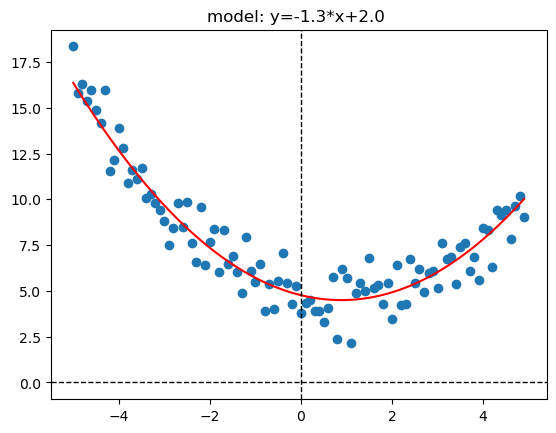

In [17]:
y_pred = A*x**2 + B*x + C

plt.scatter( x, Y, color="tab:blue", label="data")
plt.plot( x, y_pred, color="r", label="model")
plt.title(f"model: y={m:.2}*x+{b:.2} ")

plt.axhline(0, color='black', linestyle='--', linewidth=1)  # y = 0 line
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # x = 0 line
plt.show()